### In this problem you will be working with three datasets for regression:
• Housing: This is a regression dataset where the task is to predict the value of houses in the suburbs of Boston based on thirteen features that describe different aspects that are relevant to determining the value of a house, such as the number of rooms, levels of pollution in the area, etc.
• Yacht: This is a regression dataset where the task is to predict the resistance of a sail- ing yacht’s structure based on six different features that describe structural and buoyancy properties.
• Concrete: This is a regression dataset where the task is to predict the compressive strength of concrete on eight different features. There are a total of 1030 instances and all the features are numeric.

####  For both datasets use ten-fold cross-validation to calculate the RMSE (both training and test) for each fold and the overall mean RMSE. Summarize your results for each dataset as a table where you report the RMSE (both training and test) for each fold and also the average SSE and its standard deviation across the folds.

Housing dataset Linear Regression
For fold  0
Train RMSE: 16.1581723079
Test RMSE: 17.219189993
For fold  1
Train RMSE: 16.445635882
Test RMSE: 14.5807001373
For fold  2
Train RMSE: 16.2568625568
Test RMSE: 16.8676313198
For fold  3
Train RMSE: 16.2343846223
Test RMSE: 16.5212316955
For fold  4
Train RMSE: 16.2999334454
Test RMSE: 15.8555034212
For fold  5
Train RMSE: 16.1880573456
Test RMSE: 16.8194622522
For fold  6
Train RMSE: 16.2564160976
Test RMSE: 16.2189476672
For fold  7
Train RMSE: 16.0799732399
Test RMSE: 17.7565769028
For fold  8
Train RMSE: 16.4033127164
Test RMSE: 14.4030095344
For fold  9
Train RMSE: 16.2808059102
Test RMSE: 16.2556644717
Overall Mean Train RMSE: 16.2603554124
Overall Mean Test RMSE: 16.2497917395
Overall Mean Train SSE: 13220.4862
Overall Mean Test SSE: 13254.5015029
std of train SSE: 1505.16298442
std of test SSE: 1622.8141408

Yacht dataset Linear Regression
For fold  0
Train RMSE: 10.790679129
Test RMSE: 9.57164745808
For fold  1
Train RMSE: 10.89344

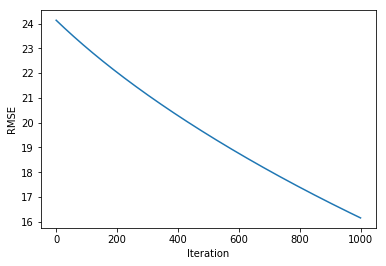

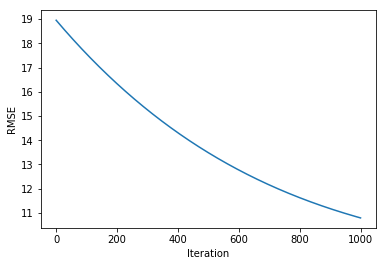

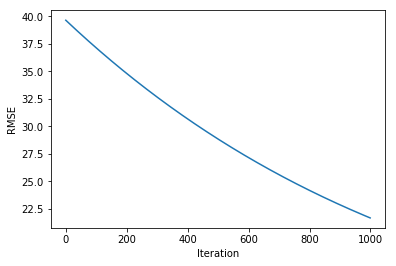

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from csv import reader
from sklearn.preprocessing import StandardScaler
from random import randrange
import operator
%matplotlib inline  

def plot_line(x, y, y_hat,line_color='blue'):
    # Plot outputs
    plt.scatter(x, y,  color='black')
    plt.plot(x, y_hat, color=line_color,
             linewidth=3)
    plt.xticks(())
    plt.yticks(())

    plt.show()


def linear_grad_func(theta, x, y):
    # compute gradient
    grad = np.dot((linear_val_func(theta, x) - y).T, np.c_[np.ones(x.shape[0]), x])
    grad = grad / x.shape[0]

    return grad

def linear_val_func(theta, x):
    # forwarding
    return np.dot(np.c_[np.ones(x.shape[0]), x], theta.T)


def linear_cost_func(theta, x, y):
    # compute cost (loss)
    y_hat = linear_val_func(theta, x)
    cost = np.mean((y_hat-y)**2)
    return cost


def linear_grad_desc(theta, X_train, Y_train, lr, max_iter, tolerance):
    cost_iter = []
    cost = linear_cost_func(theta, X_train, Y_train)
    RMSE_iter = []
    RMSE_iter.append(np.sqrt(np.sum((linear_val_func(theta, X_train) - Y_train)**2) / Y_train.shape[0]))
    cost_change = 1
    i = 1

    while cost_change > tolerance and i < max_iter:
        pre_cost = cost
        # compute gradient
        grad = linear_grad_func(theta, X_train, Y_train)
        
        # update gradient
        theta = theta - lr * grad

        # compute loss
        cost = linear_cost_func(theta, X_train, Y_train)
        RMSE_iter.append(np.sqrt(np.sum((linear_val_func(theta, X_train) - Y_train)**2) / Y_train.shape[0]))
        cost_change = abs(cost - pre_cost)
        i += 1

    return theta, RMSE_iter

def load_dataset(filename):
    '''Loads an example of market basket transactions from a provided csv file.

    Returns: A list (database) of lists (transactions). Each element of a transaction is
    an item.
    '''
    with open(filename, 'r') as dest_f:
        data_iter = reader(dest_f, delimiter=',', quotechar='"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)

    return data_array

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def linear_regression(dataset, n_folds, lr, max_iter, tolerance):
    # split dataset into training and testing
    dataset_split = cross_validation_split(dataset, n_folds)
    RMSE_train = []
    RMSE_test = []
    SSE_train = []
    SSE_test = []
    
    for i in range(n_folds):
        test = np.array(dataset_split[i])
        train = list(dataset_split)
        train.pop(i)
        train = np.array(reduce(operator.add, train))
        
        # Normalize X_Train
        X_train = train[:, :-1]
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        
        #Get the mean and std to normalize the test dataset
        X_test = test[:, :-1]
        X_test = scaler.transform(X_test)
        
        Y_train = train[:, -1]
        Y_test = test[:,-1]
        
        Y_train = Y_train[:, None]
        Y_test = Y_test[:, None]

        # Linear regression
        #  Initialize the weights for the gradient descent algorithm to all zeros
        theta = np.zeros((1, X_train.shape[1] + 1))
        # Initialize the weights for the gradient descent algorithm between 0 and 1
        #theta = np.random.rand(1, X_train.shape[1] + 1)
        
        # Initialize the weights for the gradient descent algorithm between -1 and 1
        #theta = np.random.uniform(-1, 1, X_train.shape[1] + 1)
        fitted_theta, RMSE_iter = linear_grad_desc(theta, X_train, Y_train, lr, max_iter, tolerance)
        
        # choose fold one 
        if i == 0:
            plt.figure()
            plt.plot(range(len(RMSE_iter)), RMSE_iter) 
            plt.xlabel('Iteration')
            plt.ylabel('RMSE')
        
        RMSE_test.append(np.sqrt(np.sum((linear_val_func(fitted_theta, X_test) - Y_test)**2) / Y_test.shape[0]))
        RMSE_train.append(np.sqrt(np.sum((linear_val_func(fitted_theta, X_train) - Y_train)**2) / Y_train.shape[0]))
        SSE_test.append(np.sum((linear_val_func(fitted_theta, X_test) - Y_test)**2))
        SSE_train.append(np.sum((linear_val_func(fitted_theta, X_train) - Y_train)**2))
        print "For fold ", i
        print('Train RMSE: {}'.format(RMSE_train[i]))
        print('Test RMSE: {}'.format(RMSE_test[i]))
    print('Overall Mean Train RMSE: {}'.format(np.sum(RMSE_train)*1./len(RMSE_train)))
    print('Overall Mean Test RMSE: {}'.format(np.sum(RMSE_test)*1. / len(RMSE_test)))
    print('Overall Mean Train SSE: {}'.format((np.sum(SSE_train)*1./len(SSE_train)) / 9.))
    print('Overall Mean Test SSE: {}'.format(np.sum(SSE_test)*1. / len(SSE_test)))
    print('std of train SSE: {}'.format(np.std(np.array(SSE_train), axis=0)))
    print('std of test SSE: {}'.format(np.std(np.array(SSE_test), axis=0)))
    return RMSE_test, RMSE_train
    

def sklearn_linear_regression(dataset, n_folds):
    # split dataset into training and testing
    X_train = X[:-20, :]
    X_test = X[-20:, :]

    Y_train = Y[:-20, None]
    Y_test = Y[-20:, None]

    # Linear regression
    regressor = linear_model.LinearRegression()
    regressor.fit(X_train, Y_train)
    print('Coefficients: {}'.format(regressor.coef_))
    print('Intercept: {}'.format(regressor.intercept_))
    print('MSE:{}'.format(np.mean((regressor.predict(X_test) - Y_test) ** 2)))

   # plot_line(X_test, Y_test, regressor.predict(X_test),line_color='red')

def main():
    dataset = load_dataset("housing.csv")
    dataset = dataset.astype(float)
    
    print('Housing dataset Linear Regression')
    linear_regression(dataset, n_folds=10, lr=0.0004, max_iter=1000, tolerance=0.04)
    print ('')
    
    dataset = load_dataset("yachtData.csv")
    dataset = dataset.astype(float)
    print('Yacht dataset Linear Regression')
    linear_regression(dataset, n_folds=10, lr=0.001, max_iter=1000, tolerance=0.001)
    print ('')
    
    dataset = load_dataset("concreteData.csv")
    dataset = dataset.astype(float) 
    print('Concrete dataset Linear Regression')
    linear_regression(dataset, n_folds=10, lr=0.0007, max_iter=1000, tolerance=0.0001)
    print ('')
    
if __name__ == "__main__":
    main()